In [8]:
import os 
import sys 
from os import path
import mujoco
import mediapy as media

#sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "fr3_env_mujoco", "fr3_robot")))
XML_FILE = r"C:\Users\cesar\OneDrive\Documenti\GitHub\ES-sim2real\Meta-RL\Scripts\FR3\fr3_env_mujoco\fr3_robot\fr3_w_hand.xml"

def load_n_animate(xml_path):
    # model description, i.e., all quantities which do not change over time
    model = mujoco.MjModel.from_xml_path(xml_path) # for reference attributes of model: https://github.com/google-deepmind/mujoco/blob/main/include/mujoco/mjmodel.h

    try:
        model.geom()
    except KeyError as e:
        print(e) # error can be used to print actual attribute names for geoms of model

    # state and quantities that depend on it. The state is made up of time, generalized positions and generalized velocities
    data = mujoco.MjData(model) # only changes once it's propagated through the simulation
    print("time:", data.time)
    print("qpos:", data.qpos)
    print("qvel:", data.qvel)

    # print x,y,z position of the first body
    print("pos of first body {}: {}".format(model.body(0).name, data.xpos[0]))

    with mujoco.Renderer(model) as renderer:
        mujoco.mj_forward(model, data)
        renderer.update_scene(data)

        media.show_image(renderer.render())

"Invalid name ''. Valid names: ['fr3_link0_collision', 'fr3_link1_collision', 'fr3_link2_collision', 'fr3_link3_collision', 'fr3_link4_collision', 'fr3_link5_collision', 'fr3_link6_collision', 'fr3_link7_collision']"
time: 0.0
qpos: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
qvel: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
pos of first body world: [0. 0. 0.]


""

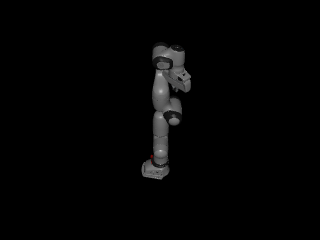

In [9]:
if not os.path.exists(XML_FILE):
        print("{} File does not exist".format(XML_FILE))

load_n_animate(XML_FILE)